In [1]:
import numpy as np

In [228]:
logic_q = np.load("logic_q-1.02-4-adjust-8.npy")

In [403]:
np.save( 'logic_q-1.02-4-adjust-10', logic_q )

In [ ]:
4, 5, 5, 1, 1, 5, 5, 1
4, 5, 5, 1, 0, 5, 5, 1
4, 5, 5, 1, 5, 0, 5, 1

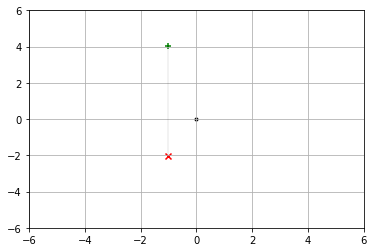

In [409]:
s=[4, 5, 5, 1, 5, 2, 5, 1]

t_x, t_y, o_x, o_y = logic2xy( s )

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter( t_x, t_y, color='green', marker='+')#plot points
ax.scatter( o_x, o_y, color='red', marker='x')#plot points

ax.scatter( 0, 0, color='black', marker='.')#plot points

ax.plot( [t_x, o_x], [t_y, o_y], color='black', linewidth=0.1)#plot lines

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.grid(True)
plt.show()

reward_keep=[0]

In [407]:
logic_q[   s[0], s[1], s[2], s[3], s[4], s[5], s[6],  s[7]   ,:]

array([ 0.,  0.,  0.,  0.,  0.])

In [408]:
logic_action_2( s , 0)

In [179]:
def logic2xy( s ):
    s=np.array(s)+0.01

    if s[0]<5:
        t_y = s[0]
    if s[1]<5:
        t_y = -s[1]
    if s[2]<5:
        t_x = s[2]
    if s[3]<5:
        t_x = -s[3]        

    if s[4]<5:
        o_y = s[4]
    if s[5]<5:
        o_y = -s[5]
    if s[6]<5:
        o_x = s[6]
    if s[7]<5:
        o_x = -s[7] 

    return t_x, t_y, o_x, o_y

def xy2xy_mirror( t_x, t_y, o_x, o_y ):
    a = [t_x, t_y, o_x, o_y]
    t_x=a[1]
    t_y=a[0]
    o_x=a[3]
    o_y=a[2]
    return t_x, t_y, o_x, o_y

def xy2xy_rotate( t_x, t_y, o_x, o_y ): # anti clockwise
    a = [t_x, t_y, o_x, o_y]
    t_x = -a[1]
    t_y=a[0]
    o_x = -a[3]
    o_y=a[2]

    return t_x, t_y, o_x, o_y

def xy2logic( t_x, t_y, o_x, o_y ):
    s=[5,5,5,5,   5,5,5,5]
    if t_y>0:
        s[0]=int(around(t_y-0.01))
    if t_y<0:
        s[1]=int(around(-t_y-0.01))
    if t_x>0:
        s[2]=int(around(t_x-0.01))
    if t_x<0:
        s[3]=int(around(-t_x-0.01))

    if o_y>0:
        s[4]=int(around(o_y-0.01))
    if o_y<0:
        s[5]=int(around(-o_y-0.01))
    if o_x>0:
        s[6]=int(around(o_x-0.01))
    if o_x<0:
        s[7]=int(around(-o_x-0.01))

    return s


    # [0, 5, 3, 5, 5, 0, 1, 5]

def logic_action_2( s, act ):
    e = s
    action = act

    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.

    a,b,c,d=logic2xy(s)
    # rotate 1
    print a,b,c,d
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    print a,b,c,d
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    print "e: ", e
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.
    # rotate 2
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.
    # rotate 3
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.

    # Mirror
    action = act

    a,b,c,d=logic2xy(s)




    a,b,c,d = xy2xy_mirror( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 2
    elif action == 3:
        action = 1
    elif action == 1:
        action = 3
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.





    # rotate 1
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.
    # rotate 2
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.
    # rotate 3
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.   